# Find the emotion of the song 


In [1]:
import numpy as np
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import operator

### Read the NRC emotion dataset

In [2]:
NRC = pd.read_csv("FINAL_DATASET.csv")
NRC.head()

,English Word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,test
0,aback,0,0,0,0,0,0,0,0,1,0,True
1,abacus,0,0,0,0,0,0,0,0,0,1,True
2,abandon,0,1,0,0,0,1,0,1,0,0,True
3,abandoned,0,1,1,0,0,1,0,1,0,0,True
4,abandonment,0,1,1,0,0,1,0,1,1,0,True


In [3]:
NRC.describe()

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
count,10917.000000,10917.000000,10917.000000,10917.000000,10917.000000,10917.000000,10917.000000,10917.000000,10917.000000,10917.000000
mean,0.250069,0.309059,0.140515,0.135935,0.116516,0.152056,0.298250,0.124668,0.051479,0.120363
std,0.433072,0.462127,0.347536,0.342735,0.320857,0.359092,0.457511,0.330357,0.220983,0.325400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Read the lyrics dataset

In [4]:
data = pd.read_csv("/home/saniya/Documents/machine learning/J COMPONENT/380000-lyrics-from-metrolyrics/lyrics.csv")
data.shape

(362237, 6)

In [5]:
data.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [6]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
stop_words = set(stopwords.words('english')) 

In [8]:
temp_data = data
temp_data.shape

(362237, 6)

In [9]:
temp_data = temp_data.dropna(axis=0)
temp_data.shape

(266556, 6)

In [10]:
temp_data.columns

Index(['index', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')

In [11]:
temp_data.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [12]:
temp_data = temp_data.apply(lambda x: x.astype(str).str.lower())
temp_data.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,pop,"oh baby, how you doing?\nyou know i'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,pop,if you search\nfor tenderness\nit isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,pop,"oh oh oh i, oh oh oh i\n[verse 1:]\nif i wrote..."
4,4,black-culture,2009,beyonce-knowles,pop,"party the people, the people the party it's po..."


In [13]:
temp_data['genre'].value_counts()

rock             109235
pop               40466
hip-hop           24850
not available     23941
metal             23759
country           14387
jazz               7970
electronic         7966
other              5189
r&b                3401
indie              3149
folk               2243
Name: genre, dtype: int64

In [14]:
temp_data.groupby(['genre']).groups.keys()

dict_keys(['country', 'electronic', 'folk', 'hip-hop', 'indie', 'jazz', 'metal', 'not available', 'other', 'pop', 'r&b', 'rock'])

### Input the song whose emotion needs to be found

In [15]:
data1 = temp_data.iloc[8].lyrics
data1

"[verse 1:]\ni read all of the magazines\nwhile waiting around\nyou said you couldn't wait to see me\nbut you got stuck in town\nso turn off the phone\nnow we're finally alone\nand some moments at the end of the day\nfeel your touch and it's the sweetest\nyour kisses are my weakness\ni never want them to go away\nchorus:\ni wanna feel you in my heart (heart)\nas i look into your eyes (eyes)\nno need to get busy so lets take our time\nand make slow love slow love\nand every minute that we have (have)\nit goes too fast\nwanna show you how to rock it\nso this feelin last and\nmake slow love slow love\nslow love slow love slow love all night\nverse 2:\nit is just a few little things\nthat you gotta know\na girl will give you all of her heart\nwhen it's happening slow\ni need a little laughter\nand love will follow after\nlets take this chance to steal away\nyour kisses are delicious\nand no one is gonna miss us\ntonight i really want you to stay\nchorus:\ni wanna feel you in my heart (hear

In [16]:
replaced_data1 =  data1.replace("'", '').replace(",", " ").replace("?", " ").replace("!", " ").replace(".", " ")
replaced_data1

'[verse 1:]\ni read all of the magazines\nwhile waiting around\nyou said you couldnt wait to see me\nbut you got stuck in town\nso turn off the phone\nnow were finally alone\nand some moments at the end of the day\nfeel your touch and its the sweetest\nyour kisses are my weakness\ni never want them to go away\nchorus:\ni wanna feel you in my heart (heart)\nas i look into your eyes (eyes)\nno need to get busy so lets take our time\nand make slow love slow love\nand every minute that we have (have)\nit goes too fast\nwanna show you how to rock it\nso this feelin last and\nmake slow love slow love\nslow love slow love slow love all night\nverse 2:\nit is just a few little things\nthat you gotta know\na girl will give you all of her heart\nwhen its happening slow\ni need a little laughter\nand love will follow after\nlets take this chance to steal away\nyour kisses are delicious\nand no one is gonna miss us\ntonight i really want you to stay\nchorus:\ni wanna feel you in my heart (heart)\n

In [17]:
word_tokens = word_tokenize(replaced_data1)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
print (filtered_sentence)

['[', 'verse', '1', ':', ']', 'read', 'magazines', 'waiting', 'around', 'said', 'couldnt', 'wait', 'see', 'got', 'stuck', 'town', 'turn', 'phone', 'finally', 'alone', 'moments', 'end', 'day', 'feel', 'touch', 'sweetest', 'kisses', 'weakness', 'never', 'want', 'go', 'away', 'chorus', ':', 'wan', 'na', 'feel', 'heart', '(', 'heart', ')', 'look', 'eyes', '(', 'eyes', ')', 'need', 'get', 'busy', 'lets', 'take', 'time', 'make', 'slow', 'love', 'slow', 'love', 'every', 'minute', '(', ')', 'goes', 'fast', 'wan', 'na', 'show', 'rock', 'feelin', 'last', 'make', 'slow', 'love', 'slow', 'love', 'slow', 'love', 'slow', 'love', 'slow', 'love', 'night', 'verse', '2', ':', 'little', 'things', 'got', 'ta', 'know', 'girl', 'give', 'heart', 'happening', 'slow', 'need', 'little', 'laughter', 'love', 'follow', 'lets', 'take', 'chance', 'steal', 'away', 'kisses', 'delicious', 'one', 'gon', 'na', 'miss', 'us', 'tonight', 'really', 'want', 'stay', 'chorus', ':', 'wan', 'na', 'feel', 'heart', '(', 'heart', ')

In [18]:
final_sentence = ' '.join(filtered_sentence)
final_sentence

'[ verse 1 : ] read magazines waiting around said couldnt wait see got stuck town turn phone finally alone moments end day feel touch sweetest kisses weakness never want go away chorus : wan na feel heart ( heart ) look eyes ( eyes ) need get busy lets take time make slow love slow love every minute ( ) goes fast wan na show rock feelin last make slow love slow love slow love slow love slow love night verse 2 : little things got ta know girl give heart happening slow need little laughter love follow lets take chance steal away kisses delicious one gon na miss us tonight really want stay chorus : wan na feel heart ( heart ) look eyes ( eyes ) need get busy lets take time make slow love slow love every minute ( ) goes fast wan na show rock feelin last make slow love slow love slow love slow love slow love night bridge : im callin hear cries dont say goodbye breath skin cherish taste far good go waste feel desire make sweet love night make love night chorus : wan na feel heart ( heart ) l

In [19]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

count=word_count(final_sentence)

In [20]:
print(count)

{'[': 1, 'verse': 2, '1': 1, ':': 7, ']': 1, 'read': 1, 'magazines': 1, 'waiting': 1, 'around': 1, 'said': 1, 'couldnt': 1, 'wait': 1, 'see': 1, 'got': 2, 'stuck': 1, 'town': 1, 'turn': 1, 'phone': 1, 'finally': 1, 'alone': 1, 'moments': 1, 'end': 1, 'day': 1, 'feel': 6, 'touch': 1, 'sweetest': 1, 'kisses': 2, 'weakness': 1, 'never': 1, 'want': 2, 'go': 2, 'away': 2, 'chorus': 4, 'wan': 8, 'na': 9, 'heart': 9, '(': 12, ')': 12, 'look': 4, 'eyes': 8, 'need': 5, 'get': 4, 'busy': 4, 'lets': 5, 'take': 5, 'time': 4, 'make': 10, 'slow': 27, 'love': 29, 'every': 4, 'minute': 4, 'goes': 4, 'fast': 4, 'show': 4, 'rock': 4, 'feelin': 4, 'last': 4, 'night': 6, '2': 1, 'little': 2, 'things': 1, 'ta': 1, 'know': 1, 'girl': 1, 'give': 1, 'happening': 1, 'laughter': 1, 'follow': 1, 'chance': 1, 'steal': 1, 'delicious': 1, 'one': 1, 'gon': 1, 'miss': 1, 'us': 1, 'tonight': 1, 'really': 1, 'stay': 1, 'bridge': 1, 'im': 1, 'callin': 1, 'hear': 1, 'cries': 1, 'dont': 1, 'say': 1, 'goodbye': 1, 'breath'

### Method 1: Find the emotion of the maximum occuring word in the song

In [21]:
max_word=max(count, key=count.get)
print(max_word)

love


In [22]:
def findEmotion(data):
    for index, row in NRC.iterrows():
        rowVal = row['English Word']
        if data == rowVal:
            return (row)

In [25]:
findEmotion(max_word)

English Word    love
Positive           1
Negative           0
Anger              0
Anticipation       0
Disgust            0
Fear               0
Joy                1
Sadness            0
Surprise           0
Trust              0
test            True
Name: 7444, dtype: object

### Method 2: Predict sentiment using Naive Bayes

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
#import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve
import seaborn as sns


In [27]:
new= pd.read_table('/home/saniya/Documents/machine learning/J COMPONENT/NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
new = new[new.Association != 0]
new.head()

,Word,Emotion,Association
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1


In [28]:
emotion_dict = {'trust':0, 'fear':1, 'negative':1, 'sadness':1,'anger':1,'surprise':0,'positive':0,'disgust':1,'joy':0,'anticipation':1}
new["Emotion"] = new["Emotion"].apply(lambda line: emotion_dict[line])
#trust,joy,anticipation,surprise: Positive
#sadness,anger,disgust,fear: negative



In [29]:
 new1=new.drop(columns=['Association'])

In [30]:
new1['Emotion'].replace(0, 'positive',inplace=True)
new1['Emotion'].replace(1, 'negative',inplace=True)



In [31]:
new1.head()

,Word,Emotion
19,abacus,positive
23,abandon,negative
25,abandon,negative
27,abandon,negative
30,abandoned,negative


In [32]:
bow_transformer=CountVectorizer().fit(new1['Word'])
mess_bow=bow_transformer.transform(new1["Word"])
tfidf_transformer=TfidfTransformer().fit(mess_bow)
tfidf=tfidf_transformer.transform(mess_bow)

In [33]:
detector = MultinomialNB().fit(tfidf, new1['Emotion'])

In [34]:
detector.predict(tfidf)[25]
#sentiment_detector.predict("abandon")

'negative'

In [35]:
new1.Emotion[25]
#Actual Emotion

'negative'

In [36]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new1['Word'], new1['Emotion'], test_size=0) 

In [38]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         X_train,  # training data
                         y_train,  # training labels
                         #cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print (scores)

[0.73802331 0.74061286 0.73796676]


In [39]:
params = {
    'tfidf__use_idf': (True, False),
    #'bow__analyzer': (split_into_lemmas, split_into_tokens),
}
grid = GridSearchCV(
    pipeline,  # pipeline from above
    params,  # parameters to tune via cross validation
    refit=True,  # fit using all available data at the end, on the best found param combination
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores"
    scoring='accuracy',  # what score are we optimizing?
    cv=StratifiedKFold(y_train, n_folds=5),  # what type of cross validation to use
)

In [40]:
nb_detector = grid.fit(X_train, y_train)


In [41]:
max_word=[max_word]
nb_detector.predict(max_word) #max_word=love

array(['positive'], dtype='<U8')

In [42]:
all_predictions = detector.predict(tfidf)

In [43]:
accuracy=accuracy_score(new1['Emotion'], all_predictions)

In [44]:
print(accuracy)

0.9211567513128552


In [45]:
cm=confusion_matrix(new1['Emotion'], all_predictions)

In [46]:
cm

array([[8743,  392],
       [ 704, 4062]])

In [47]:
cm1_df = pd.DataFrame(cm,
index = ['No','Yes'],
columns = ['No','yes'])

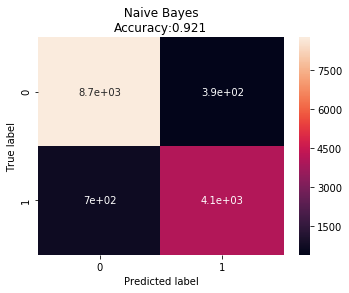

In [48]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title(' Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Method 3: Find the emotions of all the words present in the song & take the average


In [49]:
from collections import defaultdict
d = defaultdict(int)
for w in final_sentence.split():
    if w not in stop_words:
        d[w] += 1
dicts = {}
for w in sorted(d, key=d.get, reverse=True):
    #print (w, d[w])
    dicts[w] = d[w]
dicts

{'love': 29,
 'slow': 27,
 '(': 12,
 ')': 12,
 'make': 10,
 'na': 9,
 'heart': 9,
 'wan': 8,
 'eyes': 8,
 ':': 7,
 'feel': 6,
 'night': 6,
 'need': 5,
 'lets': 5,
 'take': 5,
 'chorus': 4,
 'look': 4,
 'get': 4,
 'busy': 4,
 'time': 4,
 'every': 4,
 'minute': 4,
 'goes': 4,
 'fast': 4,
 'show': 4,
 'rock': 4,
 'feelin': 4,
 'last': 4,
 'verse': 2,
 'got': 2,
 'kisses': 2,
 'want': 2,
 'go': 2,
 'away': 2,
 'little': 2,
 '[': 1,
 '1': 1,
 ']': 1,
 'read': 1,
 'magazines': 1,
 'waiting': 1,
 'around': 1,
 'said': 1,
 'couldnt': 1,
 'wait': 1,
 'see': 1,
 'stuck': 1,
 'town': 1,
 'turn': 1,
 'phone': 1,
 'finally': 1,
 'alone': 1,
 'moments': 1,
 'end': 1,
 'day': 1,
 'touch': 1,
 'sweetest': 1,
 'weakness': 1,
 'never': 1,
 '2': 1,
 'things': 1,
 'ta': 1,
 'know': 1,
 'girl': 1,
 'give': 1,
 'happening': 1,
 'laughter': 1,
 'follow': 1,
 'chance': 1,
 'steal': 1,
 'delicious': 1,
 'one': 1,
 'gon': 1,
 'miss': 1,
 'us': 1,
 'tonight': 1,
 'really': 1,
 'stay': 1,
 'bridge': 1,
 'im': 1,


In [50]:
list=[]
for key, value in dicts.items():
    #print (key, '-- ', value)
    emotion = findEmotion(key)
    list.append(emotion)

In [51]:
list

[English Word    love
 Positive           1
 Negative           0
 Anger              0
 Anticipation       0
 Disgust            0
 Fear               0
 Joy                1
 Sadness            0
 Surprise           0
 Trust              0
 test            True
 Name: 7444, dtype: object, None, None, None, English Word    make
 Positive           0
 Negative           0
 Anger              0
 Anticipation       1
 Disgust            0
 Fear               0
 Joy                0
 Sadness            0
 Surprise           0
 Trust              0
 test             NaN
 Name: 7545, dtype: object, None, English Word    heart
 Positive            0
 Negative            0
 Anger               0
 Anticipation        0
 Disgust             0
 Fear                0
 Joy                 0
 Sadness             1
 Surprise            0
 Trust               0
 test              NaN
 Name: 5803, dtype: object, English Word     wan
 Positive           0
 Negative           1
 Anger              0
 An

In [52]:
def remove_none_elements_from_list(list):
    return [e for e in list if e is not None]

In [53]:
list1=remove_none_elements_from_list(list)

In [54]:
list1

[English Word    love
 Positive           1
 Negative           0
 Anger              0
 Anticipation       0
 Disgust            0
 Fear               0
 Joy                1
 Sadness            0
 Surprise           0
 Trust              0
 test            True
 Name: 7444, dtype: object, English Word    make
 Positive           0
 Negative           0
 Anger              0
 Anticipation       1
 Disgust            0
 Fear               0
 Joy                0
 Sadness            0
 Surprise           0
 Trust              0
 test             NaN
 Name: 7545, dtype: object, English Word    heart
 Positive            0
 Negative            0
 Anger               0
 Anticipation        0
 Disgust             0
 Fear                0
 Joy                 0
 Sadness             1
 Surprise            0
 Trust               0
 test              NaN
 Name: 5803, dtype: object, English Word     wan
 Positive           0
 Negative           1
 Anger              0
 Anticipation       0
 Disg

In [55]:
d1=pd.DataFrame(list1)

In [56]:
d1

,English Word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,test
7444,love,1,0,0,0,0,0,1,0,0,0,True
7545,make,0,0,0,1,0,0,0,0,0,0,NaN
5803,heart,0,0,0,0,0,0,0,1,0,0,NaN
10760,wan,0,1,0,0,0,1,0,1,0,0,True
4751,feel,0,0,0,0,0,1,0,0,0,0,NaN
8331,night,0,0,0,0,1,0,0,0,0,0,NaN
2063,chorus,1,0,0,0,0,0,0,0,0,0,True
1659,busy,0,0,0,0,1,0,0,0,0,0,True
10301,time,0,0,0,1,0,0,0,0,0,0,True
7910,minute,0,0,0,0,0,0,1,0,0,0,NaN


In [57]:
final=d1.mean()

In [58]:
final

Positive        0.264706
Negative        0.147059
Anger           0.058824
Anticipation    0.323529
Disgust         0.205882
Fear            0.088235
Joy             0.294118
Sadness         0.147059
Surprise        0.176471
Trust           0.147059
dtype: float64

In [59]:
f1=final.tolist()

In [60]:
f1

[0.2647058823529412,
 0.14705882352941177,
 0.058823529411764705,
 0.3235294117647059,
 0.20588235294117646,
 0.08823529411764706,
 0.29411764705882354,
 0.14705882352941177,
 0.17647058823529413,
 0.14705882352941177]

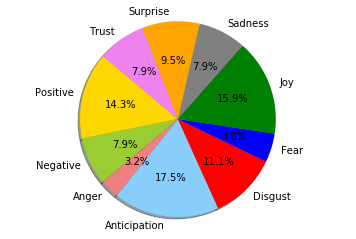

In [61]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise','Trust'
sizes = f1
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','green','grey','orange','violet']

 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


## <font color='red'> We have done this for all the songs in the dataset and stored the updated values in a new dataset </font>